In [218]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import Logit
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import f1_score, roc_curve, auc

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from scipy import stats

from matplotlib import rc
rc('font', family='AppleGothic')

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# Scale불량 데이터

In [2]:
df = pd.read_csv('SCALE불량.csv', engine = 'python', encoding = 'CP949')

In [3]:
df.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [4]:
df.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [5]:
df.describe()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1.497222,1155.338889,88.527778,1149.666667,78.802778,300.563889,1149.666667,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,0.500340,20.866398,37.660799,17.571788,36.421004,45.390303,17.571788,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1113.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1.000000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1132.000000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1155.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,2.000000,1171.000000,101.000000,1164.000000,86.000000,342.000000,1164.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,2.000000,1206.000000,312.000000,1185.000000,294.000000,398.000000,1185.000000,1078.000000,10.000000


In [6]:
df['SCALE'] = np.where(df['SCALE'] == '양품', 0,1)
df_y = df['SCALE']
df_x = df.drop(['SCALE','PLATE_NO','ROLLING_DATE'], axis = 1, inplace = False)
df.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


## 데이터 속성 및 기술통계량 확인

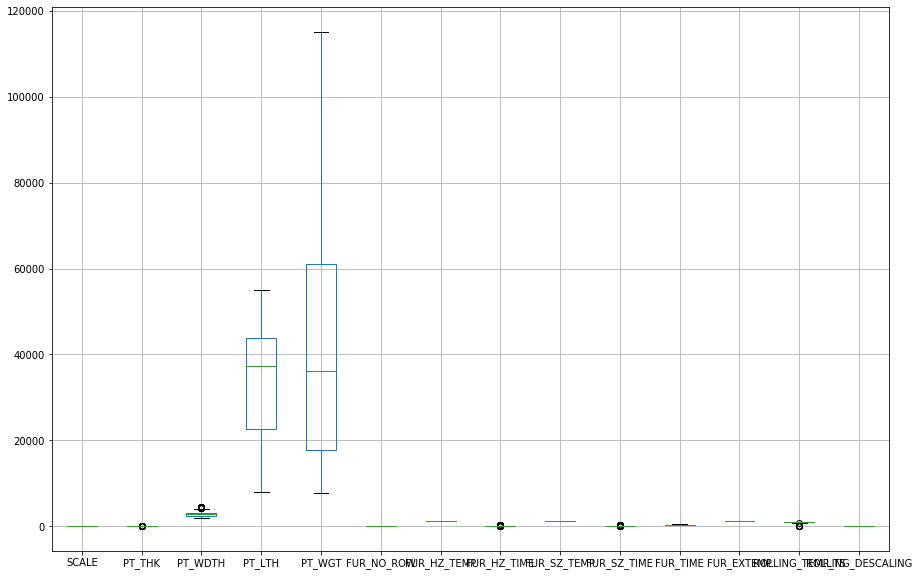

In [7]:
df.boxplot(figsize = (15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24b58e50>,
      dtype=object)

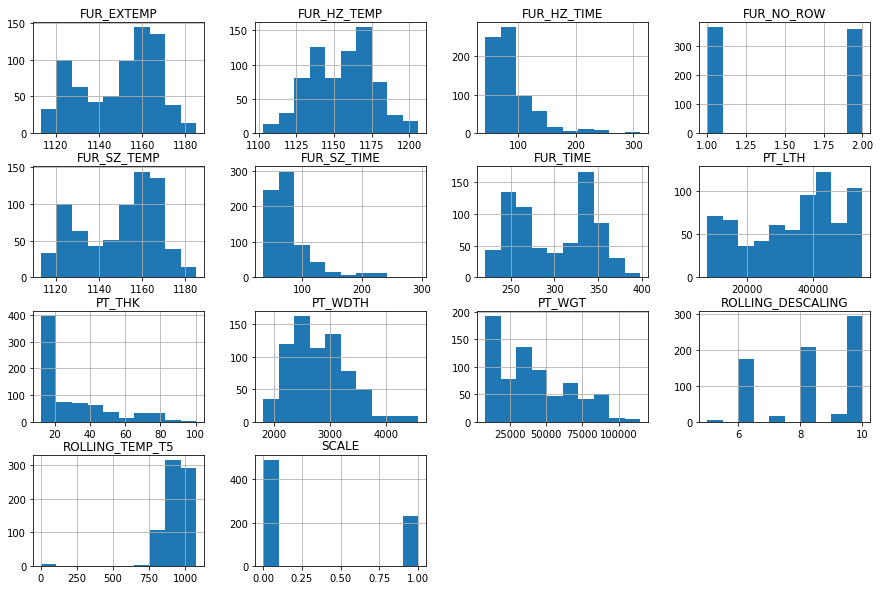

In [8]:
df.hist(figsize = (15,10))

## 이상치 제거

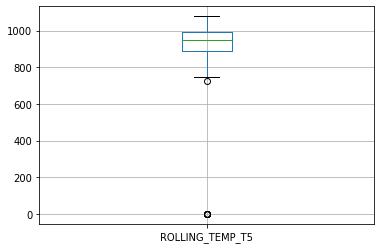

In [9]:
df[['ROLLING_TEMP_T5']].boxplot()

In [10]:
df[df.ROLLING_TEMP_T5 == 0]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,PB562815,2008-08-01:02:23:09,0,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,...,1132,95,1128,80,341,1128,0,적용,6,1조
184,PB562958,2008-08-01:10:00:06,0,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,...,1169,64,1164,61,308,1164,0,적용,10,3조
185,PB562959,2008-08-01:09:94:29,0,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,...,1163,57,1166,67,303,1166,0,적용,10,4조
494,PB563268,2008-08-02:01:10:40,0,PILAC-BT33,T5,80.82,2085,12919,17090,2호기,...,1133,89,1122,59,378,1122,0,적용,6,2조
495,PB563269,2008-08-02:01:10:36,0,PILAC-BT33,T5,80.82,2085,13176,17430,1호기,...,1130,92,1124,61,362,1124,0,적용,6,3조
496,PB563270,2008-08-02:01:10:23,0,NV-D32-TM,T0,40.35,2497,23592,37320,3호기,...,1119,109,1117,76,383,1117,0,적용,6,3조


In [11]:
df.loc[df.ROLLING_TEMP_T5 == 0, 'ROLLING_TEMP_T5'] = np.nan
df.ROLLING_TEMP_T5.fillna(method = 'ffill', inplace = True)

In [12]:
df[40:42]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
40,PB562814,2008-08-01:02:22:18,0,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,...,1126,62,1125,106,340,1125,863.0,적용,6,3조
41,PB562815,2008-08-01:02:23:09,0,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,...,1132,95,1128,80,341,1128,863.0,적용,6,1조


압연온도가 일정할 경우 0의 값이 나오는 것을 확인하여 앞의 압연온도로 대체

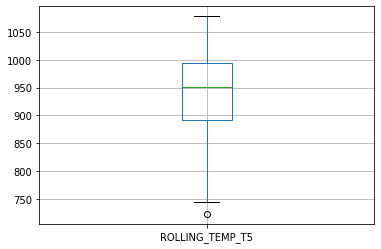

In [13]:
df[['ROLLING_TEMP_T5']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c260f6b90>]],
      dtype=object)

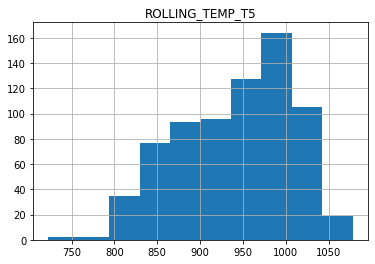

In [14]:
df[['ROLLING_TEMP_T5']].hist()

## 목표변수 'scale'와 설명변수 간의 상관성 분석

In [15]:
df.corr().round(3)

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
SCALE,1.000,-0.125,-0.206,0.100,0.219,-0.023,0.248,0.056,0.375,-0.240,-0.049,0.375,0.550,-0.007
PT_THK,-0.125,1.000,-0.313,-0.863,-0.397,-0.003,-0.524,0.160,-0.695,0.113,0.413,-0.695,-0.510,-0.837
PT_WDTH,-0.206,-0.313,1.000,0.120,0.031,0.007,0.180,-0.119,0.227,0.023,-0.393,0.227,-0.110,0.338
PT_LTH,0.100,-0.863,0.120,1.000,0.452,-0.021,0.473,-0.077,0.645,-0.070,-0.252,0.645,0.441,0.809
PT_WGT,0.219,-0.397,0.031,0.452,1.000,-0.022,0.153,0.010,0.360,-0.191,-0.058,0.360,0.423,0.239
FUR_NO_ROW,-0.023,-0.003,0.007,-0.021,-0.022,1.000,0.005,-0.016,0.009,0.049,0.016,0.009,-0.006,0.018
FUR_HZ_TEMP,0.248,-0.524,0.180,0.473,0.153,0.005,1.000,-0.114,0.773,-0.222,-0.348,0.773,0.364,0.471
FUR_HZ_TIME,0.056,0.160,-0.119,-0.077,0.010,-0.016,-0.114,1.000,-0.203,0.178,0.473,-0.203,0.002,-0.138
FUR_SZ_TEMP,0.375,-0.695,0.227,0.645,0.360,0.009,0.773,-0.203,1.000,-0.451,-0.477,1.000,0.667,0.649
FUR_SZ_TIME,-0.240,0.113,0.023,-0.070,-0.191,0.049,-0.222,0.178,-0.451,1.000,0.443,-0.451,-0.375,-0.106


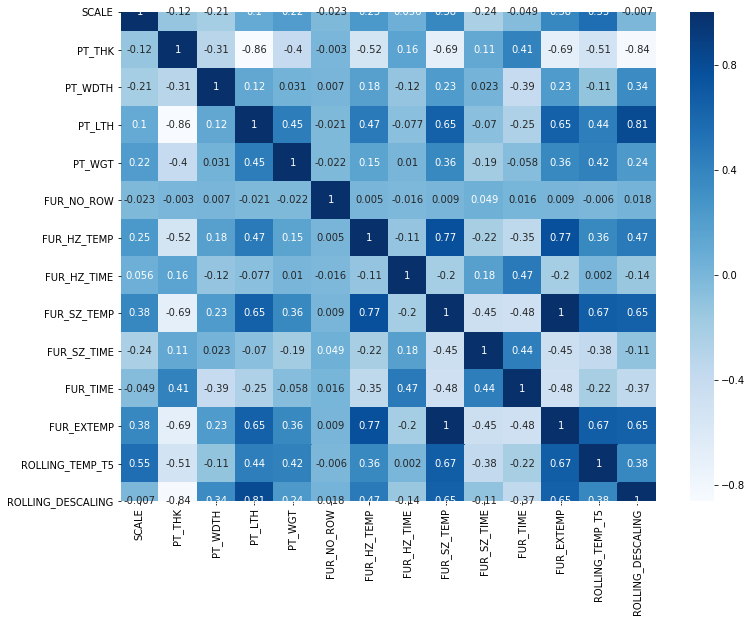

In [16]:
plt.figure(figsize = (12,9))
sns.heatmap(df.corr(method = 'pearson').round(3), annot = True, cmap = 'Blues')

## PT-THK plate 두께

In [17]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'PT_THK'], df.loc[df.SCALE==1,'PT_THK'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:3.828
p:0.0


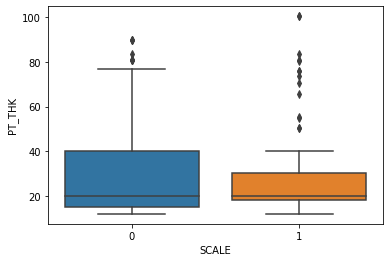

In [18]:
sns.boxplot( x = 'SCALE', y = 'PT_THK', data = df)

## PT-WDTH plate 폭

In [19]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'PT_WDTH'], df.loc[df.SCALE==1,'PT_WDTH'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:5.659
p:0.0


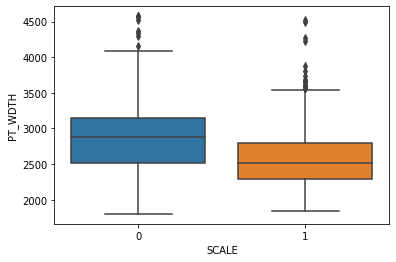

In [20]:
sns.boxplot( x = 'SCALE', y = 'PT_WDTH', data = df)

## PT-LTH plate 길이

In [21]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'PT_LTH'], df.loc[df.SCALE==1,'PT_LTH'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:-3.126
p:0.002


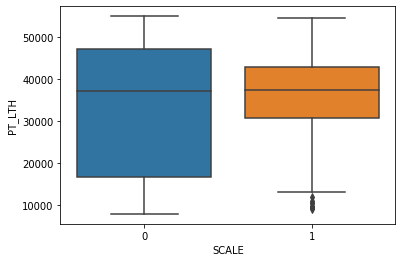

In [22]:
sns.boxplot( x = 'SCALE', y = 'PT_LTH', data = df)

## PT-WGT plate 중량

In [23]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'PT_WGT'], df.loc[df.SCALE==1,'PT_WGT'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:-5.97
p:0.0


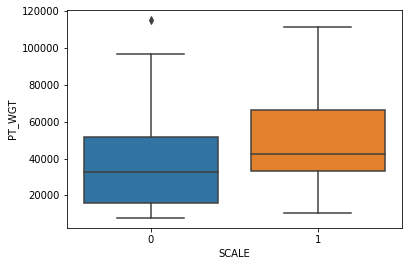

In [24]:
sns.boxplot( x = 'SCALE', y = 'PT_WGT', data = df)

## FUR_HZ_TEMP 가열대 온도

In [25]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'FUR_HZ_TEMP'], df.loc[df.SCALE==1,'FUR_HZ_TEMP'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:-7.203
p:0.0


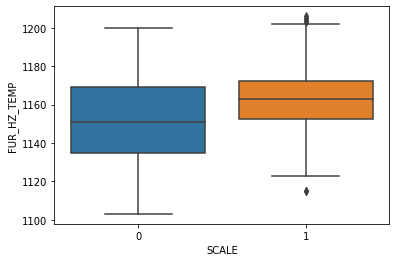

In [26]:
sns.boxplot( x = 'SCALE', y = 'FUR_HZ_TEMP', data = df)

## FUR_HZ_TIME 가열대 시간

In [27]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'FUR_HZ_TIME'], df.loc[df.SCALE==1,'FUR_HZ_TIME'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:-1.376
p:0.17


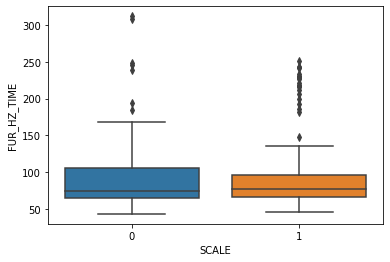

In [28]:
sns.boxplot( x = 'SCALE', y = 'FUR_HZ_TIME', data = df)

## FUR_SZ_TEMP 균열대 온도

In [29]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'FUR_SZ_TEMP'], df.loc[df.SCALE==1,'FUR_SZ_TEMP'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:-12.197
p:0.0


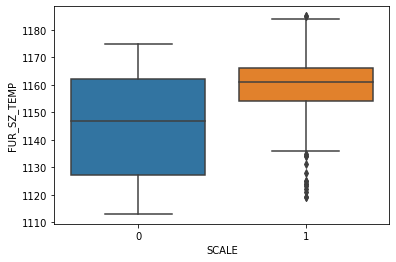

In [30]:
sns.boxplot( x = 'SCALE', y = 'FUR_SZ_TEMP', data = df)

## FUR_SZ_TIME 균열대 시간

In [31]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'FUR_SZ_TIME'], df.loc[df.SCALE==1,'FUR_SZ_TIME'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:8.333
p:0.0


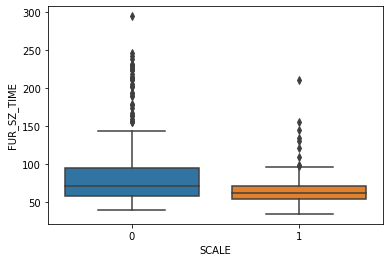

In [32]:
sns.boxplot( x = 'SCALE', y = 'FUR_SZ_TIME', data = df)

## FUR_TIME 가열로 시간

In [33]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'FUR_TIME'], df.loc[df.SCALE==1,'FUR_TIME'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:1.393
p:0.164


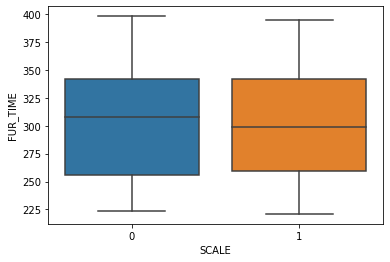

In [34]:
sns.boxplot( x = 'SCALE', y = 'FUR_TIME', data = df)

## FUR_EXTEMP 추출온도

In [35]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'FUR_EXTEMP'], df.loc[df.SCALE==1,'FUR_EXTEMP'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:-12.197
p:0.0


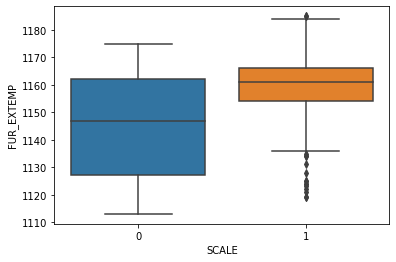

In [36]:
sns.boxplot( x = 'SCALE', y = 'FUR_EXTEMP', data = df)

## ROLLING_TEMP_T5 압연온도

In [37]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'ROLLING_TEMP_T5'], df.loc[df.SCALE==1,'ROLLING_TEMP_T5'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:-18.409
p:0.0


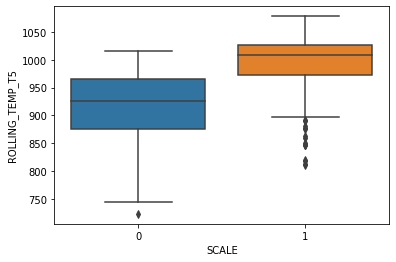

In [38]:
sns.boxplot( x = 'SCALE', y = 'ROLLING_TEMP_T5', data = df)

## ROLLING_DESCALING 압연 중 Descaling 횟수

In [39]:
t_result = stats.ttest_ind(df.loc[df.SCALE==0,'ROLLING_DESCALING'], df.loc[df.SCALE==1,'ROLLING_DESCALING'], equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:0.203
p:0.839


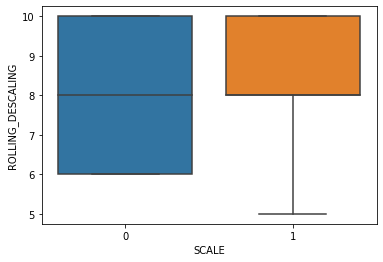

In [40]:
sns.boxplot( x = 'SCALE', y = 'ROLLING_DESCALING', data = df)

In [41]:
df.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934.0,적용,8,2조
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937.0,적용,8,2조
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889.0,적용,8,3조
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885.0,적용,8,3조
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873.0,적용,8,1조


## 강종의 종류 T,C로 분류

In [15]:
df['STEEL_KIND_TC'] = df.STEEL_KIND.str[0]
df.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,STEEL_KIND_TC
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,116,1133,59,282,1133,934.0,적용,8,2조,T
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,122,1135,53,283,1135,937.0,적용,8,2조,T
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,116,1121,55,282,1121,889.0,적용,8,3조,T
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,125,1127,68,316,1127,885.0,적용,8,3조,T
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,134,1128,48,314,1128,873.0,적용,8,1조,T


In [43]:
df.SCALE

0      0
1      0
2      0
3      0
4      0
      ..
715    1
716    0
717    0
718    0
719    0
Name: SCALE, Length: 720, dtype: int64

In [44]:
pd.DataFrame(df.groupby(['SCALE','STEEL_KIND_TC']).count().iloc[:,0])

PLATE_NO
SCALE STEEL_KIND_TC          
0     C                   297
      T                   192
1     C                   214
      T                    17

In [45]:
pd.DataFrame(df.groupby(['SCALE','HSB']).count().iloc[:,0])

PLATE_NO
SCALE HSB          
0     적용        489
1     미적용        33
      적용        198

In [46]:
pd.DataFrame(df.groupby(['SCALE','FUR_NO']).count().iloc[:,0])

PLATE_NO
SCALE FUR_NO          
0     1호기          167
      2호기          167
      3호기          155
1     1호기           73
      2호기           70
      3호기           88

In [47]:
pd.DataFrame(df.groupby(['SCALE','FUR_NO_ROW']).count().iloc[:,0])

PLATE_NO
SCALE FUR_NO_ROW          
0     1                242
      2                247
1     1                120
      2                111

In [48]:
pd.DataFrame(df.groupby(['SCALE','WORK_GR']).count().iloc[:,0])

PLATE_NO
SCALE WORK_GR          
0     1조            122
      2조            120
      3조            118
      4조            129
1     1조             67
      2조             45
      3조             54
      4조             65

In [49]:
pd.DataFrame(df.groupby(['SCALE','ROLLING_DESCALING']).count().iloc[:,0])

PLATE_NO
SCALE ROLLING_DESCALING          
0     6                       150
      8                       109
      10                      230
1     5                         5
      6                        26
      7                        15
      8                        99
      9                        20
      10                       66

탐색적 분석 후, 고른 변수들만 가지고 모델링

In [204]:
df_y = df['SCALE']
df_x = df.drop(['SCALE','PLATE_NO','ROLLING_DATE','SPEC','STEEL_KIND','FUR_NO_ROW','FUR_TIME','FUR_HZ_TIME','FUR_SZ_TEMP'], axis = 1, inplace = False)

# train/valid/test 데이터셋 분할

In [205]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size = 0.4, random_state = 1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size = 0.5, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("valid data X size : {}".format(df_valid_x.shape))
print("valid data Y size : {}".format(df_valid_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (288, 13)
train data Y size : (288,)
valid data X size : (216, 13)
valid data Y size : (216,)
test data X size : (216, 13)
test data Y size : (216,)


In [206]:
df2 = df.drop(['PLATE_NO','ROLLING_DATE','SPEC','STEEL_KIND','FUR_NO_ROW','FUR_TIME','FUR_HZ_TIME','FUR_SZ_TEMP'], axis = 1, inplace = False)
df_train, df_test = train_test_split(df2, train_size = 0.4, random_state = 1234)
df_valid, df_test = train_test_split(df_test, train_size = 0.5, random_state = 1234)

## 모델링 기법

## 로지스틱 회귀

In [28]:
df_train.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,STEEL_KIND_TC
456,0,60.58,2305,12224,26800,2호기,1166,156,1121,891.0,적용,6,2조,T
17,0,50.46,2200,21756,37920,3호기,1124,87,1124,929.0,적용,6,3조,T
251,0,16.09,2512,37380,35580,3호기,1149,51,1151,973.0,적용,10,2조,C
609,0,20.18,2200,40687,85080,3호기,1162,68,1162,982.0,적용,8,4조,C
205,1,30.13,2288,30730,33260,1호기,1160,88,1158,1032.0,적용,8,1조,C


In [207]:
log_model = Logit.from_formula("""SCALE~PT_THK +PT_WDTH +PT_LTH +PT_WGT+FUR_NO +FUR_HZ_TEMP +FUR_SZ_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+HSB+ROLLING_DESCALING+WORK_GR+STEEL_KIND_TC""", df_train)

log_result = log_model.fit()

print(log_result.summary())

         Current function value: 0.250921
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  288
Model:                          Logit   Df Residuals:                      271
Method:                           MLE   Df Model:                           16
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:                  0.6027
Time:                        16:30:58   Log-Likelihood:                -72.265
converged:                      False   LL-Null:                       -181.90
Covariance Type:            nonrobust   LLR p-value:                 9.827e-38
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -73.3128    3.6e+04     -0.002      0.998   -7.07e+04    7.05e+04
FUR_NO[T.2호기]          0.4967      0.539 

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [208]:
y_pred = log_result.predict(df_valid)
y_pred_class = (y_pred>0.5).astype(int)
y_pred_class.head()

704    0
715    1
85     1
327    1
367    0
dtype: int64

In [209]:
print("Accuracy : {0:.3f}\n".format(accuracy_score(df_valid['SCALE'], y_pred_class)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_valid["SCALE"], y_pred_class)))

Accuracy : 0.819

Confusion Matrix : 
[[121  25]
 [ 14  56]]


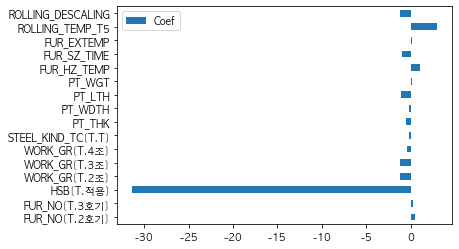

In [219]:
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = 'Coef')

## 표준화 회귀계수

In [211]:
df_char = df2.select_dtypes(include = 'object')
df_numeric = df2.select_dtypes(exclude = 'object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,FUR_NO,HSB,WORK_GR,STEEL_KIND_TC
0,-0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.544097,-0.949149,-0.112864,-0.19693,1호기,적용,2조,T
1,-0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.708951,-0.835252,-0.067399,-0.19693,1호기,적용,2조,T
2,-0.687308,0.209106,1.568896,-1.095771,-0.944112,-1.263141,-0.654000,-1.632537,-0.794850,-0.19693,2호기,적용,3조,T
3,-0.687308,0.209106,1.568896,-1.095771,-0.944112,-0.160124,-0.296815,-1.290843,-0.855471,-0.19693,2호기,적용,3조,T
4,-0.687308,0.473482,0.562094,-1.518889,-1.174562,-0.735611,-0.846330,-1.233894,-1.037334,-0.19693,3호기,적용,1조,T


In [212]:
df_scaled['SCALE'] = np.where(df_scaled['SCALE']>0,1,0)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,FUR_NO,HSB,WORK_GR,STEEL_KIND_TC
0,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.544097,-0.949149,-0.112864,-0.19693,1호기,적용,2조,T
1,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.708951,-0.835252,-0.067399,-0.19693,1호기,적용,2조,T
2,0,0.209106,1.568896,-1.095771,-0.944112,-1.263141,-0.654000,-1.632537,-0.794850,-0.19693,2호기,적용,3조,T
3,0,0.209106,1.568896,-1.095771,-0.944112,-0.160124,-0.296815,-1.290843,-0.855471,-0.19693,2호기,적용,3조,T
4,0,0.473482,0.562094,-1.518889,-1.174562,-0.735611,-0.846330,-1.233894,-1.037334,-0.19693,3호기,적용,1조,T


In [213]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, train_size = 0.4, random_state = 1234)
df_scaled_valid, df_scaled_test = train_test_split(df_scaled_test, train_size = 0.5, random_state = 1234)

In [214]:
log_model = Logit.from_formula("""SCALE~PT_THK +PT_WDTH +PT_LTH +PT_WGT+FUR_NO +FUR_HZ_TEMP +FUR_SZ_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+HSB+ROLLING_DESCALING+WORK_GR+STEEL_KIND_TC""", df_scaled_train)

log_result = log_model.fit()

print(log_result.summary())

         Current function value: 0.250921
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  288
Model:                          Logit   Df Residuals:                      271
Method:                           MLE   Df Model:                           16
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:                  0.6027
Time:                        16:31:17   Log-Likelihood:                -72.265
converged:                      False   LL-Null:                       -181.90
Covariance Type:            nonrobust   LLR p-value:                 9.827e-38
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             29.4745    3.6e+04      0.001      0.999   -7.06e+04    7.06e+04
FUR_NO[T.2호기]          0.4967      0.539 

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.api import qqplot, add_constant
df_x = df_train.drop(['SCALE','FUR_NO','HSB','WORK_GR','STEEL_KIND_TC'], axis = 1)
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
6,FUR_SZ_TIME,1.429
4,PT_WGT,1.569
2,PT_WDTH,1.774
8,ROLLING_TEMP_T5,2.852
5,FUR_HZ_TEMP,2.911
9,ROLLING_DESCALING,4.708
1,PT_THK,6.241
3,PT_LTH,6.706
7,FUR_EXTEMP,7.723
0,const,13876.188


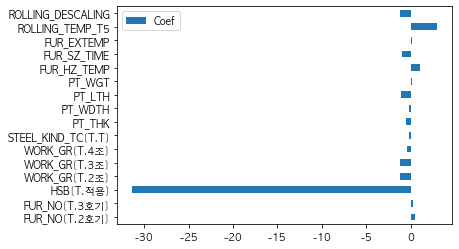

In [220]:
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = 'Coef')

# 의사결정나무

In [221]:
df_dummy = pd.get_dummies(df2)
df_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,...,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조,STEEL_KIND_TC_C,STEEL_KIND_TC_T
0,0,32.25,3707,15109,14180,1144,59,1133,934.0,8,...,0,0,0,1,0,1,0,0,0,1
1,0,32.25,3707,15109,14180,1144,53,1135,937.0,8,...,0,0,0,1,0,1,0,0,0,1
2,0,33.27,3619,19181,18130,1129,55,1121,889.0,8,...,1,0,0,1,0,0,1,0,0,1
3,0,33.27,3619,19181,18130,1152,68,1127,885.0,8,...,1,0,0,1,0,0,1,0,0,1
4,0,38.33,3098,13334,12430,1140,48,1128,873.0,8,...,0,1,0,1,1,0,0,0,0,1


In [222]:
df_y = df_dummy['SCALE']
df_x = df_dummy.drop('SCALE', axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size = 0.4, random_state = 1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size = 0.5, random_state = 1234)

In [223]:
train_accuracy = []; valid_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    valid_accuracy.append(tree.score(df_valid_x,df_valid_y))

    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['ValidAccuracy'] = valid_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidAccuracy
0,1,0.878,0.875
1,2,0.920,0.898
2,3,0.958,0.949
3,4,0.965,0.954
4,5,0.965,0.954
5,6,0.979,0.954
6,7,0.983,0.940
7,8,0.990,0.917
8,9,0.997,0.912
9,10,1.000,0.903


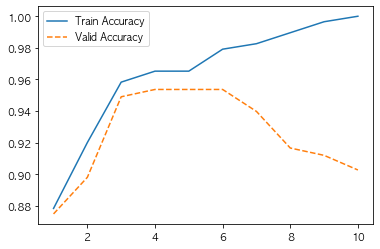

In [224]:
plt.plot(para_depth, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_depth, valid_accuracy, linestyle='--', label = 'Valid Accuracy')
plt.legend()

In [225]:
train_accuracy = [];valid_accuracy= []
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234,max_depth = 5, 
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    valid_accuracy.append(tree.score(df_valid_x,df_valid_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainAccuracy'] = train_accuracy
df_score_split['ValidAccuracy'] = valid_accuracy
df_score_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidAccuracy
0,4,0.965,0.954
1,6,0.965,0.954
2,8,0.965,0.954
3,10,0.965,0.954
4,12,0.965,0.954
5,14,0.965,0.954
6,16,0.965,0.954
7,18,0.965,0.954
8,20,0.965,0.954
9,22,0.965,0.954


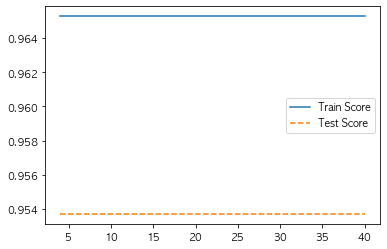

In [226]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = "Train Score")
plt.plot(para_split, valid_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [227]:
train_accuracy = [];valid_accuracy= []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234,max_depth = 5, 
                                  min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    valid_accuracy.append(tree.score(df_valid_x,df_valid_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_accuracy
df_score_leaf['ValidScore'] = valid_accuracy
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidScore
0,2,0.965,0.954
1,4,0.972,0.949
2,6,0.958,0.949
3,8,0.958,0.949
4,10,0.958,0.949
5,12,0.924,0.889
6,14,0.913,0.880
7,16,0.903,0.866
8,18,0.899,0.875
9,20,0.899,0.875


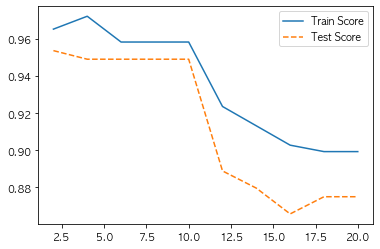

In [228]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = "Train Score")
plt.plot(para_leaf, valid_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [48]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = 5, random_state= 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [229]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy : {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy : 0.972

Confusion Matrix : 
[[148   1]
 [  5  62]]


In [230]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,ROLLING_TEMP_T5,0.640
13,HSB_적용,0.171
6,FUR_EXTEMP,0.170
8,ROLLING_DESCALING,0.019
0,PT_THK,0.000
12,HSB_미적용,0.000
18,STEEL_KIND_TC_C,0.000
17,WORK_GR_4조,0.000
16,WORK_GR_3조,0.000
15,WORK_GR_2조,0.000


Text(0, 0.5, '변수')

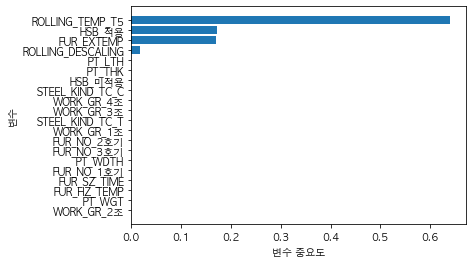

In [231]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 랜덤포레스트

In [71]:
train_accuracy = []; valid_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators,
                                oob_score = True,random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_valid_x,df_valid_y))

    
df_accuracy_n= pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['ValidAccuracy'] = valid_accuracy

df_accuracy_n.round(3)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


,n_estimators,TrainAccuracy,ValidAccuracy
0,10,0.993,0.935
1,20,1.000,0.954
2,30,1.000,0.949
3,40,1.000,0.958
4,50,1.000,0.954
5,60,1.000,0.958
6,70,1.000,0.949
7,80,1.000,0.949
8,90,1.000,0.949
9,100,1.000,0.949


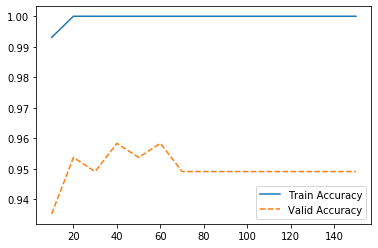

In [72]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_n_tree, valid_accuracy, linestyle='--', label = "Valid Accuracy")
plt.legend()

In [73]:
train_accuracy = []; valid_accuracy = []

para_depth = [depth for depth in range(1,15)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(n_estimators = 40, max_depth = v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_valid_x,df_valid_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['ValidAccuracy'] = valid_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidAccuracy
0,1,0.858,0.833
1,2,0.896,0.880
2,3,0.944,0.935
3,4,0.962,0.921
4,5,0.969,0.940
5,6,0.969,0.944
6,7,0.983,0.949
7,8,0.997,0.944
8,9,1.000,0.944
9,10,1.000,0.963


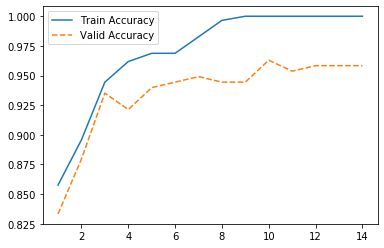

In [74]:
plt.plot(para_depth, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle='--', label = "Valid Accuracy")
plt.legend()

In [75]:
train_accuracy = [];valid_accuracy= []
para_split = [n_split * 1 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state = 1234, n_estimators = 40, max_depth = 7, 
                                 min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_valid_x,df_valid_y))
    
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['ValidAccuracy'] = valid_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidAccuracy
0,2,0.983,0.949
1,3,0.979,0.949
2,4,0.983,0.958
3,5,0.983,0.944
4,6,0.983,0.944
5,7,0.979,0.949
6,8,0.976,0.944
7,9,0.976,0.949
8,10,0.976,0.940
9,11,0.972,0.944


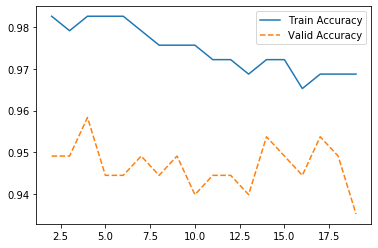

In [76]:
plt.plot(para_split, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_split, valid_accuracy, linestyle='--', label = "Valid Accuracy")
plt.legend()

In [77]:
train_accuracy = [];valid_accuracy= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, n_estimators = 40, max_depth = 7,
                                min_samples_split = 17,min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_valid_x,df_valid_y))
    
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['ValidAccuracy'] = valid_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidAccuracy
0,1,0.969,0.954
1,2,0.958,0.931
2,3,0.955,0.926
3,4,0.951,0.926
4,5,0.944,0.912
5,6,0.938,0.903
6,7,0.938,0.912
7,8,0.917,0.880
8,9,0.913,0.861
9,10,0.903,0.861


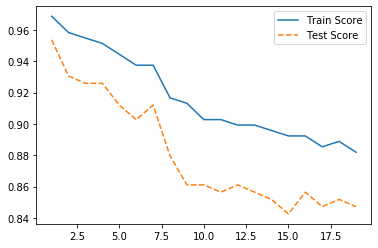

In [78]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label = "Train Score")
plt.plot(para_leaf, valid_accuracy, linestyle='--', label = "Test Score")
plt.legend()

In [235]:
rf_final = RandomForestClassifier(n_estimators = 40, min_samples_split = 17, max_depth = 7, random_state= 1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=17,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [236]:
y_pred = rf_final.predict(df_test_x)
print("Accuracy on test set : {0:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on test set : 0.972

Confusion Matrix : 
[[148   1]
 [  5  62]]


Text(0, 0.5, '변수')

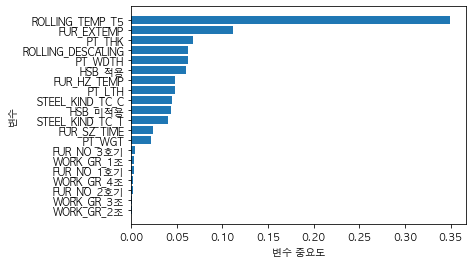

In [234]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## 그래디언트 부스팅

In [120]:
train_accuracy = []; valid_accuracy = []

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    valid_accuracy.append(gb.score(df_valid_x,df_valid_y))

    
df_accuracy_lr= pd.DataFrame()
df_accuracy_lr['LearningRate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = valid_accuracy

df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.963
1,0.2,1.0,0.986
2,0.3,1.0,0.981
3,0.4,1.0,0.977
4,0.5,1.0,0.981
5,0.6,1.0,0.991
6,0.7,1.0,0.958
7,0.8,1.0,0.968
8,0.9,1.0,0.926


In [122]:
train_accuracy = []; valid_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1,25)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(learning_rate = 0.2,n_estimators = v_n_estimators , random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    valid_accuracy.append(gb.score(df_valid_x,df_valid_y))

    
df_accuracy_n= pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = valid_accuracy

df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.972,0.954
1,20,0.990,0.954
2,30,1.000,0.954
3,40,1.000,0.963
4,50,1.000,0.963
5,60,1.000,0.963
6,70,1.000,0.972
7,80,1.000,0.977
8,90,1.000,0.986
9,100,1.000,0.986


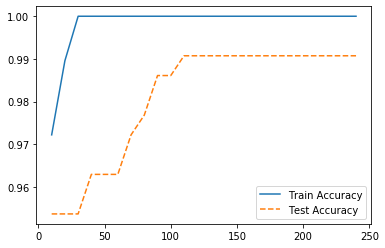

In [123]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_n_tree, valid_accuracy, linestyle='--', label = "Test Accuracy")
plt.legend()

In [124]:
train_accuracy = []; valid_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(n_estimators = 110, learning_rate = 0.2,
                                    max_depth = v_max_depth, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    valid_accuracy.append(gb.score(df_valid_x,df_valid_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = valid_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.976,0.954
1,2,1.000,0.981
2,3,1.000,0.991
3,4,1.000,0.968
4,5,1.000,0.968
5,6,1.000,0.944
6,7,1.000,0.907
7,8,1.000,0.917
8,9,1.000,0.926
9,10,1.000,0.921


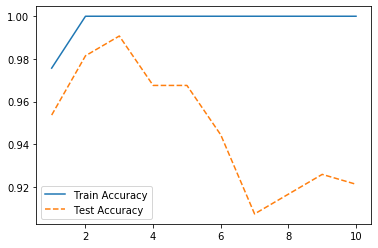

In [125]:
plt.plot(para_depth, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle='--', label = "Test Accuracy")
plt.legend()

In [126]:
train_accuracy = [];valid_accuracy= []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state = 1234,learning_rate = 0.2, n_estimators = 110, 
                                    max_depth = 3, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    valid_accuracy.append(gb.score(df_valid_x,df_valid_y))
    
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = valid_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,1.0,0.995
1,20,1.0,0.995
2,30,1.0,0.991
3,40,1.0,0.991
4,50,1.0,0.986
5,60,1.0,0.986
6,70,1.0,0.986
7,80,1.0,0.995
8,90,1.0,0.991
9,100,1.0,0.986


In [128]:
train_accuracy = [];valid_accuracy= []
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state = 1234, learning_rate = 0.2,
                                    min_samples_split = 20,
                                    n_estimators = 110, max_depth = 3, 
                                 min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    valid_accuracy.append(gb.score(df_valid_x,df_valid_y))
    
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = valid_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,1.000,0.986
1,10,1.000,0.981
2,15,1.000,0.889
3,20,1.000,0.898
4,25,1.000,0.889
5,30,1.000,0.880
6,35,1.000,0.889
7,40,1.000,0.889
8,45,0.990,0.894
9,50,0.976,0.894


In [237]:
gb_final = GradientBoostingClassifier(random_state = 1234, learning_rate = 0.2,
                                    n_estimators = 110, max_depth = 3, min_samples_split = 20,
                                 min_samples_leaf = 10)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=20,
                           min_weight_fraction_leaf=0.0, n_estimators=110,
                           n_iter_no_change=None, presort='auto',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [242]:
y_pred = gb_final.predict(df_test_x)

print("Accuracy on training set : {0:.3f}\n".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy : {0:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 1.000

Accuracy : 0.986

Confusion Matrix : 
[[148   1]
 [  2  65]]


In [240]:
df_importance = pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,ROLLING_TEMP_T5,0.610
6,FUR_EXTEMP,0.147
12,HSB_미적용,0.100
13,HSB_적용,0.048
8,ROLLING_DESCALING,0.042
0,PT_THK,0.032
1,PT_WDTH,0.004
2,PT_LTH,0.004
17,WORK_GR_4조,0.003
3,PT_WGT,0.003


Text(0, 0.5, '변수')

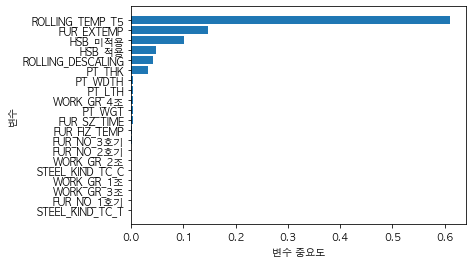

In [241]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# SVM

In [137]:
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,FUR_NO,HSB,WORK_GR,STEEL_KIND_TC
0,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.544097,-0.949149,-0.112864,-0.19693,1호기,적용,2조,T
1,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.708951,-0.835252,-0.067399,-0.19693,1호기,적용,2조,T
2,0,0.209106,1.568896,-1.095771,-0.944112,-1.263141,-0.654000,-1.632537,-0.794850,-0.19693,2호기,적용,3조,T
3,0,0.209106,1.568896,-1.095771,-0.944112,-0.160124,-0.296815,-1.290843,-0.855471,-0.19693,2호기,적용,3조,T
4,0,0.473482,0.562094,-1.518889,-1.174562,-0.735611,-0.846330,-1.233894,-1.037334,-0.19693,3호기,적용,1조,T


In [170]:
df_scaled2 = df_scaled[['SCALE','PT_THK','FUR_EXTEMP','ROLLING_TEMP_T5','HSB']]
df_scaled2.head()

,SCALE,PT_THK,FUR_EXTEMP,ROLLING_TEMP_T5,HSB
0,0,0.155812,-0.949149,-0.112864,적용
1,0,0.155812,-0.835252,-0.067399,적용
2,0,0.209106,-1.632537,-0.794850,적용
3,0,0.209106,-1.290843,-0.855471,적용
4,0,0.473482,-1.233894,-1.037334,적용


In [171]:
df_scaled2_dummy = pd.get_dummies(df_scaled2)
df_scaled2_x = df_scaled2_dummy.drop('SCALE', axis =1)

In [138]:
df_scaled_dummy  = pd.get_dummies(df_scaled)
df_scaled_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,...,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조,STEEL_KIND_TC_C,STEEL_KIND_TC_T
0,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.544097,-0.949149,-0.112864,-0.19693,...,0,0,0,1,0,1,0,0,0,1
1,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.708951,-0.835252,-0.067399,-0.19693,...,0,0,0,1,0,1,0,0,0,1
2,0,0.209106,1.568896,-1.095771,-0.944112,-1.263141,-0.654000,-1.632537,-0.794850,-0.19693,...,1,0,0,1,0,0,1,0,0,1
3,0,0.209106,1.568896,-1.095771,-0.944112,-0.160124,-0.296815,-1.290843,-0.855471,-0.19693,...,1,0,0,1,0,0,1,0,0,1
4,0,0.473482,0.562094,-1.518889,-1.174562,-0.735611,-0.846330,-1.233894,-1.037334,-0.19693,...,0,1,0,1,1,0,0,0,0,1


In [139]:
df_scaled_x = df_scaled_dummy.drop('SCALE', axis = 1)

In [173]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled2_x, train_size = 0.4, random_state = 1234)
df_scaled_valid_x, df_scaled_test_x = train_test_split(df_scaled_test_x, train_size = 0.5, random_state = 1234)

In [141]:
df_scaled_x.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조,STEEL_KIND_TC_C,STEEL_KIND_TC_T
0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.544097,-0.949149,-0.112864,-0.19693,1,0,0,0,1,0,1,0,0,0,1
1,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.708951,-0.835252,-0.067399,-0.19693,1,0,0,0,1,0,1,0,0,0,1
2,0.209106,1.568896,-1.095771,-0.944112,-1.263141,-0.654000,-1.632537,-0.794850,-0.19693,0,1,0,0,1,0,0,1,0,0,1
3,0.209106,1.568896,-1.095771,-0.944112,-0.160124,-0.296815,-1.290843,-0.855471,-0.19693,0,1,0,0,1,0,0,1,0,0,1
4,0.473482,0.562094,-1.518889,-1.174562,-0.735611,-0.846330,-1.233894,-1.037334,-0.19693,0,0,1,0,1,1,0,0,0,0,1


In [174]:
train_accuracy = []; valid_accuracy = []

para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C=v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(svm.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["ValidAccuracy"] = valid_accuracy
df_accuracy_c.round(3)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sohee/opt/anaconda3/lib/python3.7/si

,C,TrainAccuracy,ValidAccuracy
0,0.01,0.674,0.676
1,0.10,0.861,0.806
2,1.00,0.917,0.880
3,10.00,0.931,0.903


In [175]:
train_accuracy = []; valid_accuracy = []

para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(C=10, gamma = v_gamma, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(svm.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["ValidAccuracy"] = valid_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,ValidAccuracy
0,0.01,0.885,0.838
1,0.10,0.920,0.884
2,1.00,0.955,0.907
3,10.00,0.979,0.843


In [243]:
svc_final = SVC(gamma = 1, C = 10, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)

y_pred = svc_final.predict(df_scaled_test_x)

print("Accuracy on trainnig set : {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy : {:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on trainnig set : 0.955
Accuracy : 0.935
Confusion matrix: 
[[141   8]
 [  6  61]]


# KNN

## 이웃 수 증가에 따른 정확도 변화

In [177]:
train_accuracy = []; valid_accuracy = []

para_n_neighbors = [i*2 for i in range(1,20)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(knn.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["ValidAccuracy"] = valid_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,ValidAccuracy
0,2,0.955,0.898
1,4,0.941,0.898
2,6,0.938,0.903
3,8,0.934,0.894
4,10,0.927,0.884
5,12,0.917,0.880
6,14,0.917,0.870
7,16,0.917,0.870
8,18,0.913,0.866
9,20,0.903,0.852


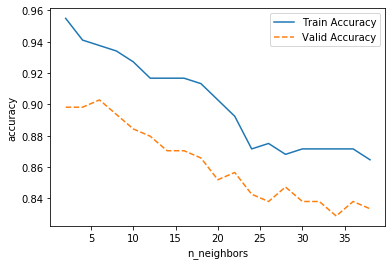

In [178]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, valid_accuracy, linestyle = '--', label = 'Valid Accuracy')
plt.ylabel("accuracy");plt.xlabel("n_neighbors")
plt.legend()

## 가중치별 이웃 수 증가에 따른 정확도 변화

In [179]:
train_accuracy = []; valid_accuracy = []

para_n_neighbors = [i for i in range(1,11)]*2

para_weights = (["uniform"])*10 +(["distance"])*10

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(knn.score(df_scaled_valid_x, df_valid_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["ValidAccuracy"] = valid_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,ValidAccuracy
0,1,uniform,1.000,0.861
1,2,uniform,0.955,0.898
2,3,uniform,0.941,0.898
3,4,uniform,0.941,0.898
4,5,uniform,0.934,0.903
5,6,uniform,0.938,0.903
6,7,uniform,0.934,0.903
7,8,uniform,0.934,0.894
8,9,uniform,0.934,0.903
9,10,uniform,0.927,0.884


In [180]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights',
                                                     values = ['TrainAccuracy','ValidAccuracy'])
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0+'_'+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,ValidAccuracy_distance,ValidAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.861111,0.861111
2,1.0,0.954861,0.861111,0.898148
3,1.0,0.940972,0.898148,0.898148
4,1.0,0.940972,0.898148,0.898148
5,1.0,0.934028,0.912037,0.902778


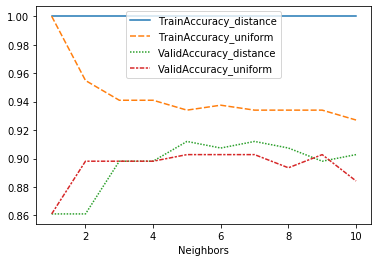

In [181]:
import seaborn as sns
sns.lineplot(data = df_accuracy_weights_pivot)

## 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [182]:
train_accuracy = []; valid_accuracy = []

para_n_neighbors = [i for i in range(1,11)]*3

para_metric = ['minkowski']*10+['euclidean']*10 +['manhattan']*10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = 'uniform')
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(knn.score(df_scaled_valid_x, df_valid_y))
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["ValidAccuracy"] = valid_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,ValidAccuracy
0,1,minkowski,1.000,0.861
1,2,minkowski,0.955,0.898
2,3,minkowski,0.941,0.898
3,4,minkowski,0.941,0.898
4,5,minkowski,0.934,0.903
5,6,minkowski,0.938,0.903
6,7,minkowski,0.934,0.903
7,8,minkowski,0.934,0.894
8,9,minkowski,0.934,0.903
9,10,minkowski,0.927,0.884


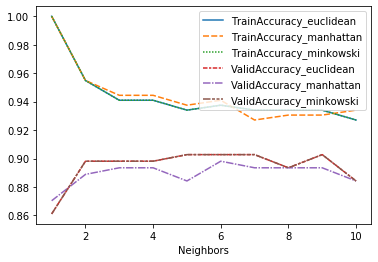

In [183]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'Neighbors', columns = 'Metric',
                                                     values = ['TrainAccuracy','ValidAccuracy'])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns = level0+'_'+level1
sns.lineplot(data = df_accuracy_metric_pivot)

In [244]:
knn_model = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', metric = 'euclidean')
knn_model.fit(df_scaled_train_x, df_train_y)

y_pred = knn_model.predict(df_scaled_test_x)

print("Accuracy on training set: {:.3f}".format(knn_model.score(df_scaled_train_x, df_train_y)))
print("Accuracy : {:.3f}".format(knn_model.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.934
Accuracy : 0.917
Confusion matrix:
[[144   5]
 [ 13  54]]


# 신경망

## Hidden Layer 은닉층 변경

In [189]:
train_accuracy = []; valid_accuracy = []

para_hidden = [20*hidden for hidden in range(1,21)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["ValidAccuracy"] = valid_accuracy
df_accuracy_hidden.round(3)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

,HiddenLayer,TrainAccuracy,ValidAccuracy
0,20,0.882,0.829
1,40,0.903,0.843
2,60,0.899,0.852
3,80,0.903,0.856
4,100,0.906,0.847
5,120,0.910,0.856
6,140,0.920,0.889
7,160,0.917,0.875
8,180,0.913,0.875
9,200,0.917,0.894


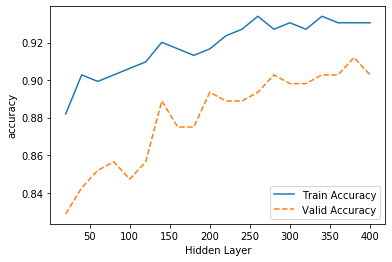

In [190]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_hidden, valid_accuracy, linestyle = '--', label = 'Valid Accuracy')
plt.ylabel("accuracy");plt.xlabel("Hidden Layer")
plt.legend()

In [191]:
train_accuracy = []; valid_accuracy = []

para_function = ["logistic", "tanh", "relu"]

for v_func in para_function:
    nn = MLPClassifier(hidden_layer_sizes = (380,380),
                       activation = v_func, random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["ValidAccuracy"] = valid_accuracy
df_accuracy_function.round(3)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFunction,TrainAccuracy,ValidAccuracy
0,logistic,0.892,0.838
1,tanh,0.931,0.903
2,relu,0.958,0.917


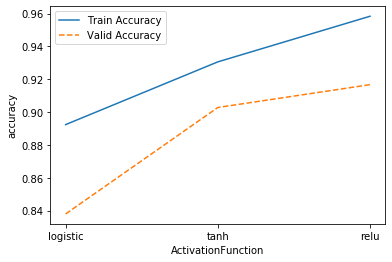

In [192]:
plt.plot(para_function, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_function, valid_accuracy, linestyle = '--', label = 'Valid Accuracy')
plt.ylabel("accuracy");plt.xlabel("ActivationFunction")
plt.legend()

In [193]:
train_accuracy = []; valid_accuracy = []

para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = "relu", hidden_layer_sizes = (380,380), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["ValidAccuracy"] = valid_accuracy
df_accuracy_solver.round(3)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Solver,TrainAccuracy,ValidAccuracy
0,lbfgs,1.000,0.870
1,sgd,0.868,0.824
2,adam,0.958,0.917


In [194]:
train_accuracy = []; valid_accuracy = []

para_batch = [20*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "relu",
                       hidden_layer_sizes = (380,380), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["ValidAccuracy"] = valid_accuracy
df_accuracy_batch.round(3)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

,Mini Batch,TrainAccuracy,ValidAccuracy
0,20,0.944,0.917
1,40,0.955,0.917
2,60,0.955,0.931
3,80,0.962,0.931
4,100,0.962,0.931
5,120,0.958,0.935
6,140,0.906,0.875
7,160,0.958,0.931
8,180,0.955,0.917


In [245]:
nn_final = MLPClassifier(batch_size = 120, solver = "adam", activation = "relu",
                       hidden_layer_sizes = (380,380), random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

y_pred = nn_final.predict(df_scaled_test_x)

print("Accuracy on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy : {:.3f}".format(nn_final.score(df_scaled_test_x, df_test_y)))

print("Confusion matrix : \n {}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.958
Accuracy : 0.963
Confusion matrix : 
 [[146   3]
 [  5  62]]
